# Pull in Data and get setup

In [158]:
import pandas as pd   #Pandas are cute and fuzzy
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier

#Read in the data from the website
titanic = pd.read_csv('http://collaboratescience.com/cheatsheets/titanic.csv')

# Analysis

In [159]:
#JEB’s visualizations under the section “Analysis through Visualisation”
#“http://104.236.231.30/titanic/jupyter_viewer/team_4_uploads/TitanicML_08242018_JEB.html”
# look at all features
# display a 40 character line, then display null values for each feature
#print('_'*40)
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [160]:
# look at the distribution of numerical features
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [161]:
# display DataFrame width and length 
titanic.shape

(1310, 14)

In [162]:
# display feature data types (strings = objects)
titanic.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [163]:
# display feature data types (strings = objects)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [164]:
# Display columns by those that are empty
titanic.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

# Review a few data groupings

In [165]:
# display median age by pclass
print("Age broken down by pclass")
titanic.groupby('pclass').median()[['age']]

Age broken down by pclass


,age
pclass,
1.0,39.0
2.0,29.0
3.0,24.0


In [166]:
# pivot of sex vs survival
titanic[['sex', 'survived']].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sex,survived
0,female,0.727468
1,male,0.190985


In [167]:
# pivot of sibsp vs survival
titanic[['sibsp', 'survived']].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)

,sibsp,survived
1,1.0,0.510972
2,2.0,0.452381
0,0.0,0.346801
3,3.0,0.300000
4,4.0,0.136364
5,5.0,0.000000
6,8.0,0.000000


# Visualizations

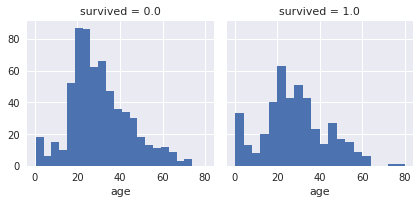

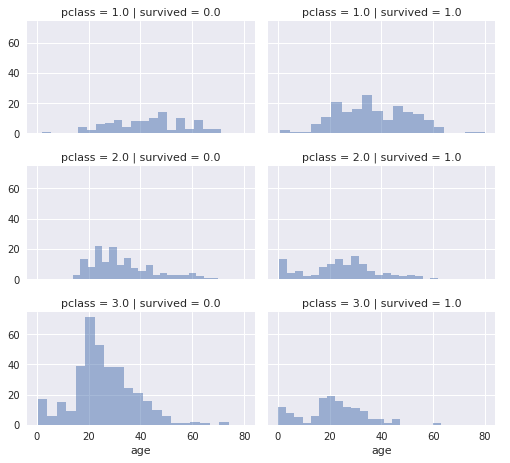

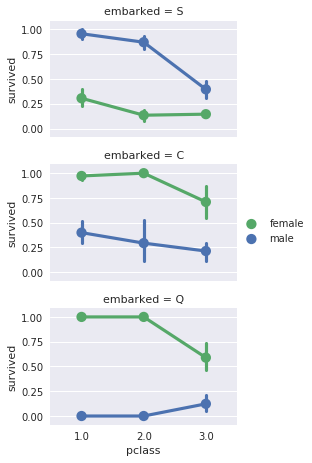

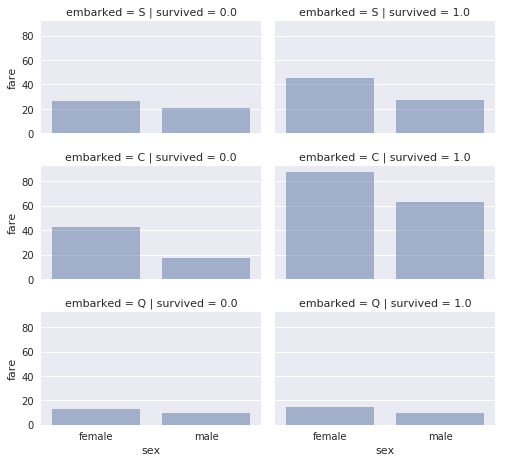

In [168]:
g = sns.FacetGrid(titanic, col='survived')
g.map(plt.hist, 'age', bins=20)

# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(titanic, col='survived', row='pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

# NOTE: third class held the largest number of passengers however the majority of them did not survive  
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(titanic, row='embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette='deep')
grid.add_legend()


# port of embarkation correlates with survival. This supports completion of 3 missing values to enable its use
#     in model development
# female passengers had much higher survival rates than males in all classes with the exception of those 
#     boarding at Southhampton where males had a higher survival rate.  This assumed to reflect a  
#     correlation between cabin class and survival rather than a direct correlation between sex and survival 
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(titanic, row='embarked', col='survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid.add_legend()

# Feature Engineering/Data Extrapolation 

In [169]:
# Create a new Title Feature
#Extract our titles with some stolen regex
titanic['title'] = titanic.name.str.extract(r', ([^\.]+)\.')

print titanic.title.value_counts()

squish_squash = {
    "Capt":       "fancy", #to indicate a societal distinction - they be fancy
    "Col":        "fancy",
    "Major":      "fancy",
    "Dr":         "fancy",
    "Rev":        "fancy",
    "Jonkheer":   "fancy",
    "Don":        "fancy",
    "Sir" :       "fancy",
    "Lady" :      "fancy",
    "the Countess":"fancy",
    "Dona":       "fancy",
    "Mme":        "Mrs",
    "Ms":         "Mrs",
    "Mrs" :       "Mrs",
    "Mlle":       "Miss",
    "Miss" :      "Miss",
    "Master" :    "Mr",
    "Mr" :        "Mr"
}
# Map them back and squash the old titles
titanic.title = titanic.title.map(squish_squash)
# view value counts for the normalized titles
print titanic.title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Mlle              2
Ms                2
Mme               1
the Countess      1
Don               1
Lady              1
Sir               1
Jonkheer          1
Dona              1
Capt              1
Name: title, dtype: int64
Mr       818
Miss     262
Mrs      200
fancy     29
Name: title, dtype: int64


/usr/local/envs/py2env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


In [170]:
#Feature: Determine the size of the family by adding siblings + parents (traveling alone or w/ parents) 
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic[['family_size', 'survived']].groupby(['family_size'], as_index=False).mean().sort_values(by='survived', ascending=False)

,family_size,survived
3,3.0,0.697674
2,2.0,0.566038
1,1.0,0.536170
0,0.0,0.302532
4,4.0,0.272727
6,6.0,0.250000
5,5.0,0.200000
7,7.0,0.000000
8,10.0,0.000000


In [171]:
#Create feature called is_alone that is equal to family_size = zero
titanic['is_alone'] = np.where(titanic['family_size'] == 0, 1, 0)
titanic[['is_alone', 'survived']].groupby(['is_alone'], as_index=False).mean()

,is_alone,survived
0,0,0.502890
1,1,0.302532


In [172]:
#Fill in the Embarked feature with the most used port 
freq_port = titanic.embarked.dropna().mode()[0]
titanic.embarked = titanic.embarked.fillna(freq_port)
titanic[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
0,C,0.555556
1,Q,0.357724
2,S,0.334061


# Add some new Features that are binned
Extrapolating if necessary

In [173]:
# apply the avg age based on the average across sex, title, parch value on the empty values (i.e. fill in our data by guestimating )
titanic.age = titanic.groupby(['sex', 'title', 'parch']).age.apply(lambda x: x.fillna(x.mean()))

#Age Binning (Option A or __ ) 
#bin the age into a few groups - use .astype to cast to string so that .fillna (used elsewhere) is easier to use
bins = [0, 18, 30, 50, 100]
bin_labels = ['child','young adult','adult','elder']
titanic['age_bin'] = pd.cut(titanic['age'], bins=bins, labels=bin_labels).astype('string')

#Convert sex to numeric values: one and zero
titanic['sex'] = titanic['sex'].replace('female', int(1))
titanic['sex'] = titanic['sex'].replace('male', int(0)) 

#Fare binning? 
titanic['fare'].fillna(titanic['fare'].dropna().median(), inplace=True)
#bin the fares into a few groups
bins = [0, 10, 20, 50, 100, 200]
bin_labels = [1,2,3,4,5]
titanic['fare_bin'] = pd.cut(titanic['fare'], bins=bins, labels=bin_labels).astype('string')

# Final set of features in model
Create a subset of features that we want to send into our estimation process

In [174]:
feature_col = ['pclass','sex','title','is_alone','age_bin','embarked','fare_bin']
X = titanic[feature_col]
X = pd.get_dummies(X, X.select_dtypes(include=['object']).keys(), drop_first = True)
#Create our test/training data
y = titanic['survived']
#drop any NA
X.dropna(inplace=True)
y.dropna(inplace=True)

# Estimation/Prediction

In [175]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [176]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print "{}%".format(acc_random_forest)

85.42%
